In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0], infer_datetime_format=True, index_col=['date'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Clean data
mask_views_high = df['value']<=df['value'].quantile(0.975)
mask_views_low = df['value']>=df['value'].quantile(0.025)
df = df[mask_views_high&mask_views_low]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


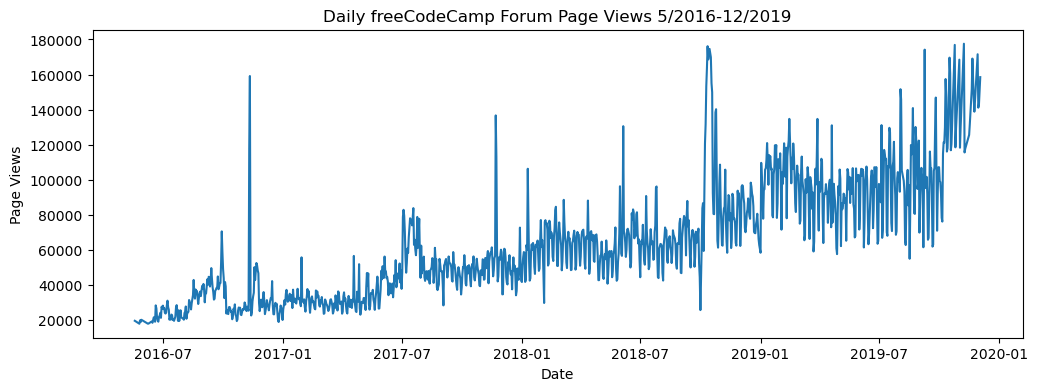

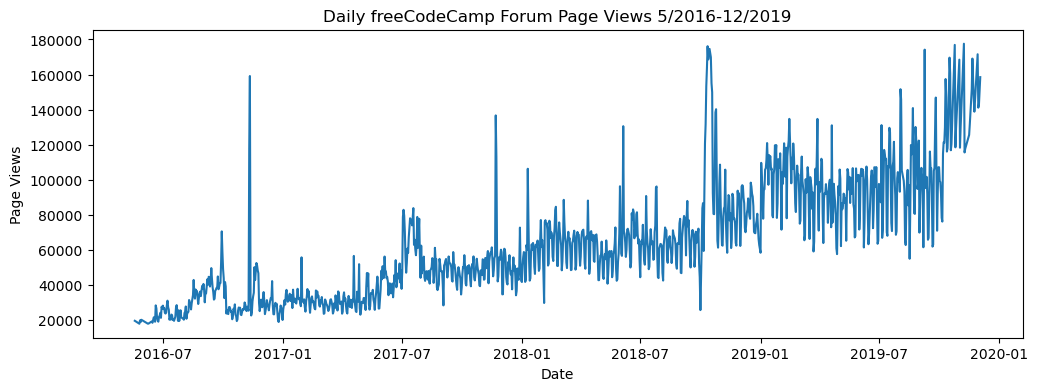

In [4]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,4])
    ax.plot(df)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    return fig
draw_line_plot()

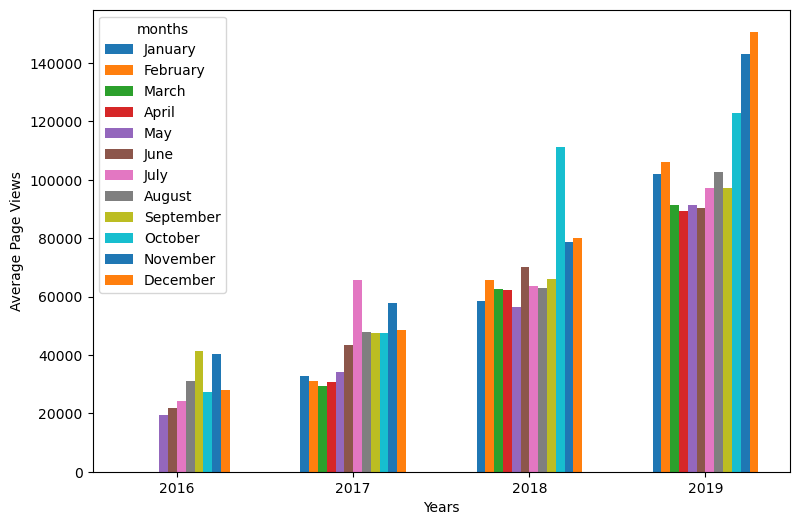

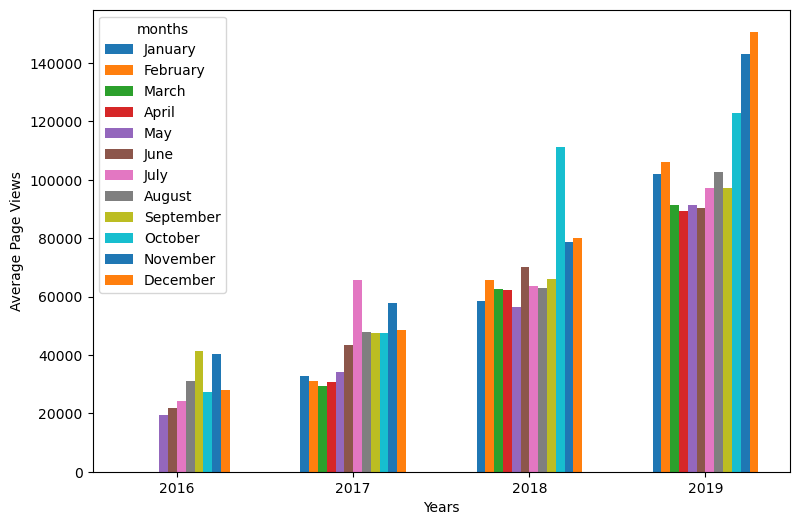

In [5]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    bar_width = .05
    df_bar = df.copy()
    df_bar = df_bar.groupby(by=df_bar.index.to_period('M')).agg('mean')
    df_bar = df_bar.reindex(index=pd.period_range(start=pd.Period('%s-01' % df_bar.index.min().year),end=df_bar.index.max(),freq='M'))
    df_bar = df_bar.fillna(0)
    df_bar = df_bar.rename_axis(index='date')
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar['x'] = df_bar['year'] + bar_width * (df_bar['month'] - 6.5)
    df_bar['month_lab'] = df_bar.index.strftime('%B')

    # Draw bar plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
    for i in range(1,13):
        df_bar_month = df_bar[df_bar['month']==i]
        df_bar_label = df_bar_month['month_lab'].unique()[0]
        ax.bar(x='x', height='value', width=bar_width, data=df_bar_month, label=df_bar_label)
    ax.legend(title='months')
    ax.set_xticks(df_bar['year'].unique())
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')

    # Save image and return fig (don't change this part)
    return fig
draw_bar_plot()

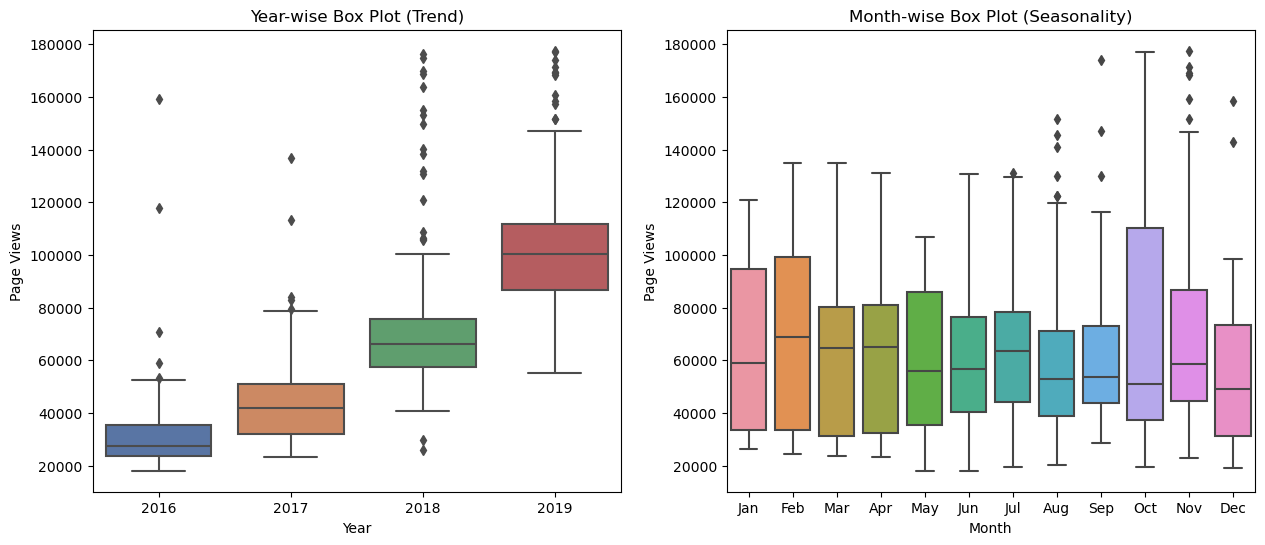

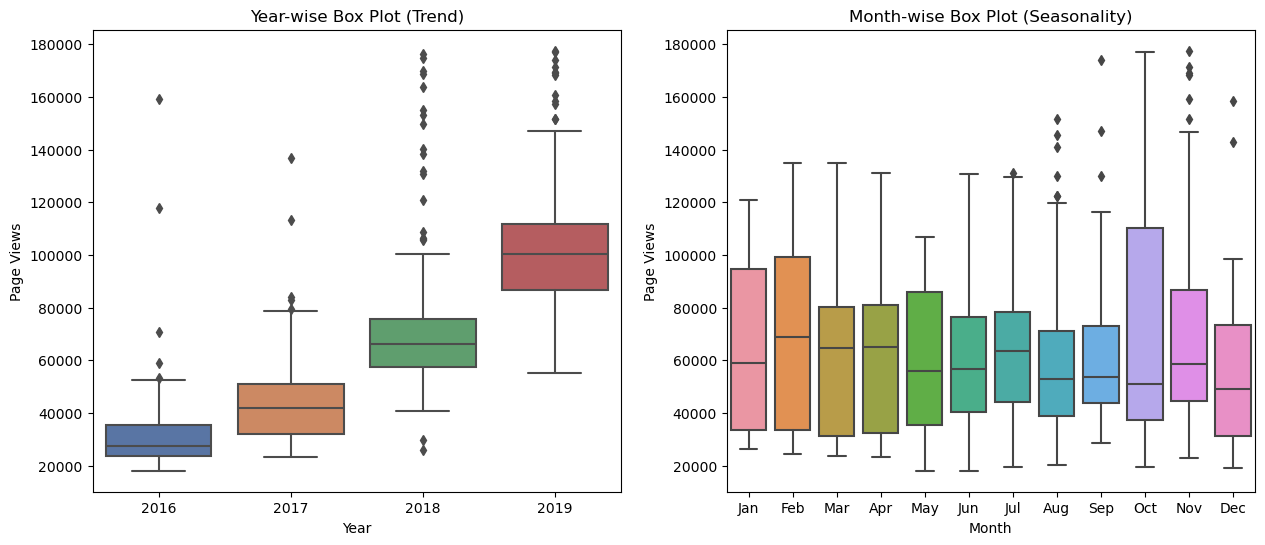

In [6]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[15,6])
    sns.set_theme()
    sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=pd.period_range(start=pd.Period('2000-01'),end=pd.Period('2000-12'),freq='M').strftime('%b'))
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    return fig
draw_box_plot()